In [34]:
import os
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plot
from matplotlib.colors import LogNorm
import healpy as hp

from pyuvdata import UVBeam
from pyuvdata.data import DATA_PATH


In [2]:
filenames = ['HERA_NicCST_150MHz.txt', 'HERA_NicCST_123MHz.txt']
cst_folder = 'NicCSTbeams'
cst_files = [os.path.join(DATA_PATH, cst_folder, f) for f in filenames]
cst_yaml_file = os.path.join(DATA_PATH, cst_folder, 'NicCSTbeams.yaml')


In [3]:
efield_beam = UVBeam()
efield_beam.read_cst_beam(cst_yaml_file, beam_type='efield')

In [4]:
input_data_array = efield_beam.data_array

In [6]:
efield_beam.interpolation_function = 'az_za_simple'
hpx_beam = efield_beam.to_healpix(inplace=False)

In [7]:
interp_data = hpx_beam.data_array

In [8]:
interp_data.shape

(2, 1, 2, 2, 49152)

In [11]:
basis_axis_index = 0
feed_index = 0
freq_index = 0

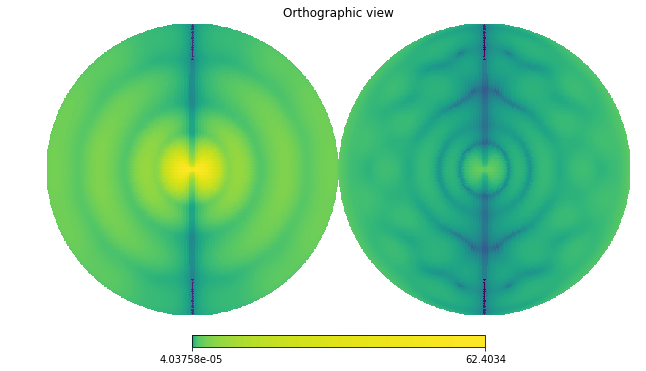

In [12]:
hp.visufunc.orthview(abs(interp_data[basis_axis_index, 0, feed_index, freq_index, :]), rot=(0,90), norm='log')

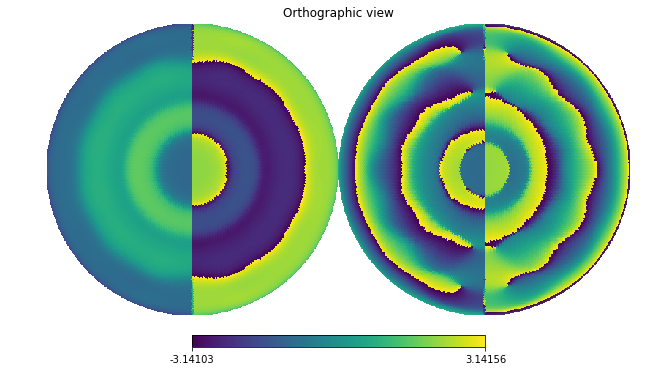

In [13]:
hp.visufunc.orthview(np.angle(interp_data[basis_axis_index, 0, feed_index, freq_index, :]), rot=(0,90))

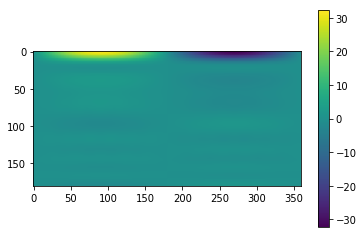

In [32]:
plot.imshow(input_data_array[basis_axis_index, 0, feed_index, freq_index, :].real)
plot.colorbar()

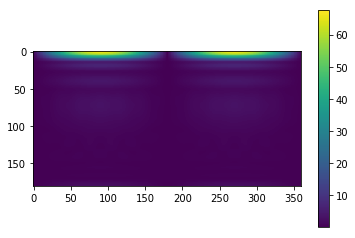

In [43]:
plot.imshow(np.abs(input_data_array[basis_axis_index, 0, feed_index, freq_index, :]))
plot.colorbar()

In [15]:
zenith_patch_theta_inds = np.where(efield_beam.axis2_array <= np.deg2rad(5.))

In [16]:
zenith_patch_theta_inds

(array([0, 1, 2, 3, 4, 5]),)

In [17]:
zenith_patch_phi_vals, zenith_patch_theta_vals = np.meshgrid(
    efield_beam.axis1_array,
    efield_beam.axis2_array[np.where(efield_beam.axis2_array <= np.deg2rad(5.))])

In [18]:
tangent_x_vals = np.sin(zenith_patch_theta_vals) * np.cos(zenith_patch_phi_vals)
tangent_y_vals = np.sin(zenith_patch_theta_vals) * np.sin(zenith_patch_phi_vals)


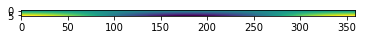

In [19]:
plot.imshow(tangent_x_vals)


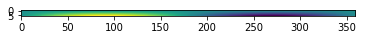

In [20]:
plot.imshow(tangent_y_vals)

In [74]:
hpx_beam.interpolation_function = 'healpix_simple'
reg_beam = hpx_beam.interp(az_array=efield_beam.axis1_array, za_array=efield_beam.axis2_array,
                          az_za_grid=True, new_object=True)

(2, 2, 65160)


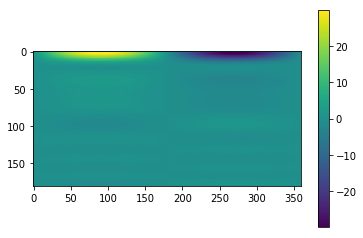

In [75]:
plot.imshow(reg_beam.data_array[basis_axis_index, 0, feed_index, freq_index, :].real)
plot.colorbar()

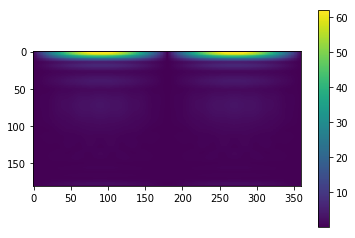

In [76]:
plot.imshow(np.abs(reg_beam.data_array[basis_axis_index, 0, feed_index, freq_index, :]))
plot.colorbar()

In [77]:
reg_diff = input_data_array-reg_beam.data_array
print(np.max(np.abs(reg_diff)))

90.97075506434194


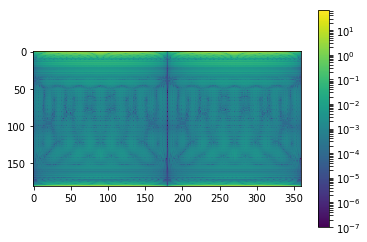

In [79]:
plot.imshow(np.abs(reg_diff[basis_axis_index, 0, feed_index, freq_index, :]), norm=LogNorm())
plot.colorbar()

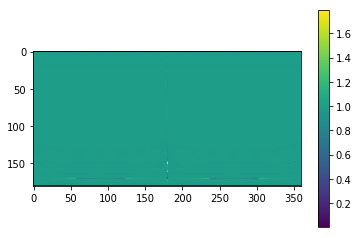

In [80]:
abs_ratio = np.abs(reg_beam.data_array) / np.abs(input_data_array)
plot.imshow(abs_ratio[basis_axis_index, 0, feed_index, freq_index, :])
plot.colorbar()

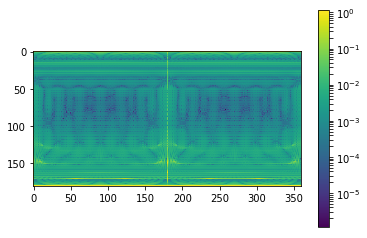

In [82]:
diff_ratio = reg_diff / np.abs(input_data_array)
plot.imshow(np.abs(diff_ratio[basis_axis_index, 0, feed_index, freq_index, :]), norm=LogNorm())
plot.colorbar()

In [95]:
print(np.max(np.abs(diff_ratio)))

2.2434543058052214


In [65]:
power_beam = efield_beam.efield_to_power(inplace=False, calc_cross_pols=False)
hpx_power_beam = power_beam.to_healpix(inplace=False)
hpx_power_beam.interpolation_function = 'healpix_simple'
reg_beam_power = hpx_power_beam.interp(az_array=power_beam.axis1_array, za_array=power_beam.axis2_array,
                                 az_za_grid=True, new_object=True)

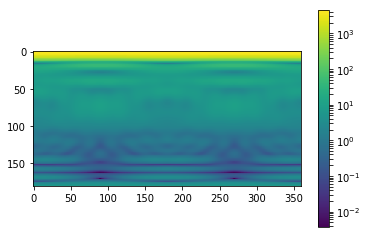

In [86]:
plot.imshow(power_beam.data_array[basis_axis_index, 0, feed_index, freq_index, :], norm=LogNorm())
plot.colorbar()

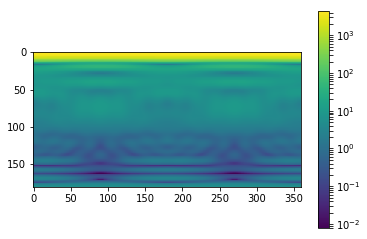

In [87]:
plot.imshow(reg_beam_power.data_array[basis_axis_index, 0, feed_index, freq_index, :], norm=LogNorm())
plot.colorbar()

In [84]:
reg_diff_power = power_beam.data_array-reg_beam_power.data_array
print(np.max(np.abs(reg_diff_power)))

121.24990425584838


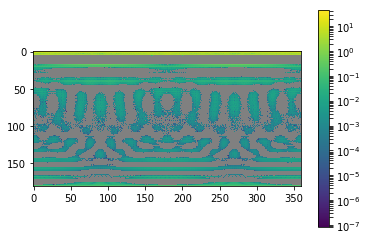

In [85]:
plot.imshow(reg_diff_power[basis_axis_index, 0, feed_index, freq_index, :], norm=LogNorm())
plot.colorbar()

In [88]:
power_ratio = reg_beam_power.data_array / power_beam.data_array

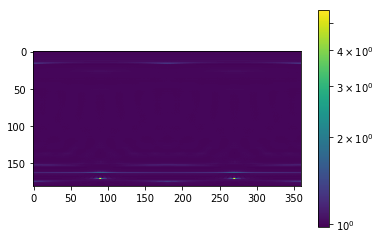

In [89]:
plot.imshow(power_ratio[basis_axis_index, 0, feed_index, freq_index, :], norm=LogNorm())
plot.colorbar()

In [90]:
power_diff_ratio = reg_diff_power / power_beam.data_array

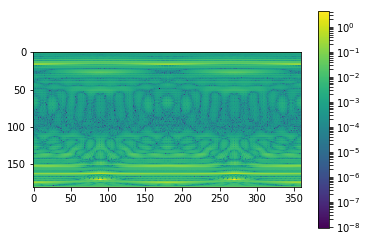

In [96]:
plot.imshow(np.abs(power_diff_ratio[basis_axis_index, 0, feed_index, freq_index, :]), norm=LogNorm())
plot.colorbar()

In [94]:
print(np.max(np.abs(power_diff_ratio)))

4.531349408313996
